##### Importing Packages

In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')
np.random.seed(4292020)

##### Products RFM Data

In [2]:
products = pd.read_csv(r'C:\Users\gpskc\products_rfm.csv')
products.set_index("StockCode",inplace=True)
products.describe()

# Recency   = Days since recent transaction
# Frequency = Number of unique transactions
# Monetary  = Avg of Quarterly Gross Margin

# Neglog Transformation: if x <= 0 then -ln(1-x) else ln(1+x)

# Scaling for Recency: 1 + 9*[max(xi)-xi]/[max(xi)-min(xi)]
# Scaling for  Others: 1 + 9*[xi-min(xi)]/[max(xi)-min(xi)]

# Rating (1-10 scale) = 0.5*Recency + 0.3*Frequency + 0.2*Monetary
# Score(1-1000 scale) = 100*Rating

,Recency,Frequency,Monetary,Recency_Neglog,Frequency_Neglog,Monetary_Neglog,Recency_Scaled,Frequency_Scaled,Monetary_Scaled
count,3764.000000,3764.000000,3764.000000,3764.000000,3764.000000,3764.000000,3764.000000,3764.000000,3764.000000
mean,561.996546,140.209086,0.139346,6.311270,4.038643,0.115674,8.837550,5.205419,5.929473
std,134.190498,203.627462,0.218174,0.196913,1.527177,0.168689,1.958690,1.919722,1.189062
min,489.000000,1.000000,-0.389111,6.194405,0.693147,-0.328664,1.000000,1.000000,2.797403
25%,496.000000,20.000000,-0.005101,6.208590,3.044522,-0.005088,9.065804,3.955771,5.078243
50%,500.000000,70.000000,0.028548,6.216606,4.262680,0.028148,9.779170,5.487043,5.312520
75%,537.250000,177.000000,0.258646,6.288323,5.181784,0.230037,9.858906,6.642392,6.735602
max,1210.000000,2572.000000,1.000000,7.099202,7.852828,0.693147,10.000000,10.000000,10.000000


##### Raw RFM Distribution

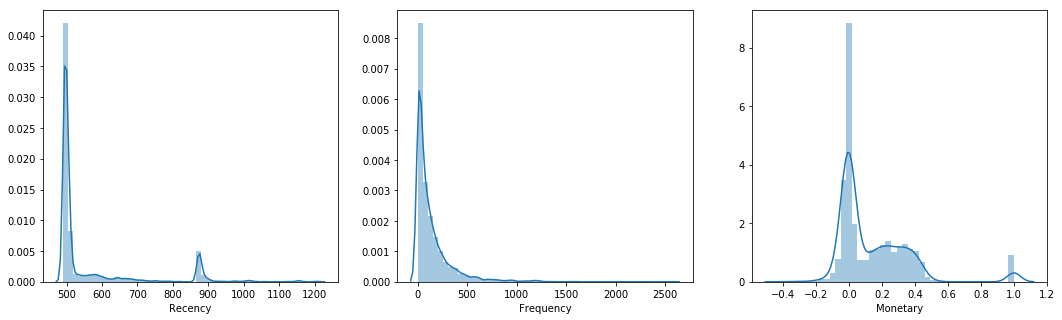

In [3]:
fig,axes = plt.subplots(1,3,figsize=(18,5))
sns.distplot(products.Recency,ax=axes[0])
sns.distplot(products.Frequency,ax=axes[1])
sns.distplot(products.Monetary,ax=axes[2])
plt.show()

##### Neglog RFM Distribution

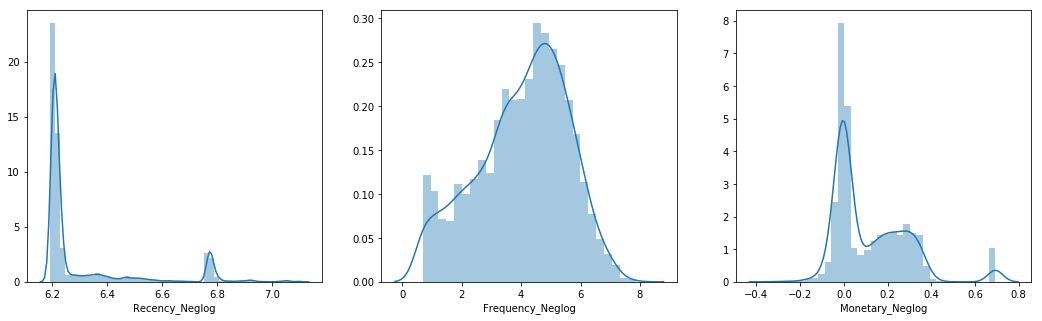

In [4]:
fig,axes = plt.subplots(1,3,figsize=(18,5))
sns.distplot(products.Recency_Neglog,ax=axes[0])
sns.distplot(products.Frequency_Neglog,ax=axes[1])
sns.distplot(products.Monetary_Neglog,ax=axes[2])
plt.show()

##### Scaled RFM Distribution

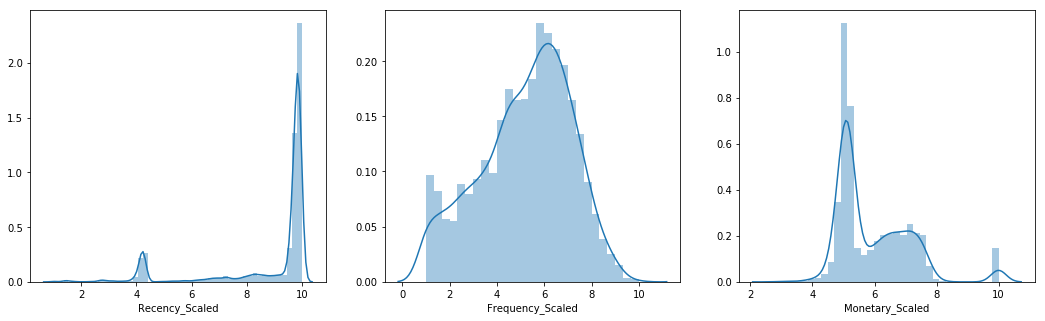

In [5]:
fig,axes = plt.subplots(1,3,figsize=(18,5))
sns.distplot(products.Recency_Scaled,ax=axes[0])
sns.distplot(products.Frequency_Scaled,ax=axes[1])
sns.distplot(products.Monetary_Scaled,ax=axes[2])
plt.show()

##### K-Means Silhouette Analysis

For n_clusters = 3 The average silhouette_score is : 0.4109978822694095


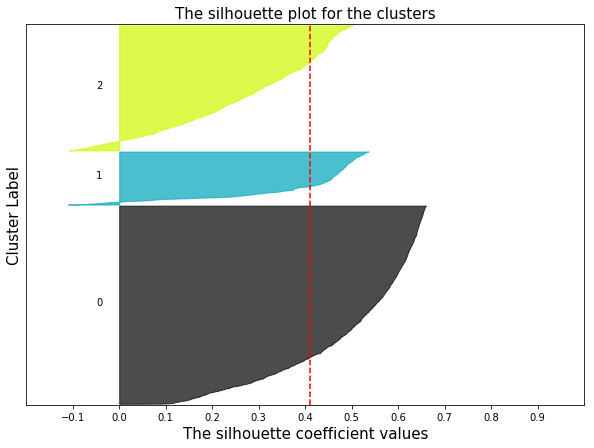

In [6]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples,silhouette_score

Y = products.iloc[:,-3:]
range_n_clusters = [3]

for n_clusters in range_n_clusters:
    fig,ax = plt.subplots(1,1)
    fig.set_size_inches(10,7)
    ax.set_xlim([-0.2,1])
    ax.set_ylim([0,len(Y)+(n_clusters+1)*10])
    clusterer = KMeans(n_clusters=n_clusters,random_state=4292020)
    cluster_labels = clusterer.fit_predict(Y)
    silhouette_avg = silhouette_score(Y,cluster_labels)
    print("For n_clusters =",n_clusters,"The average silhouette_score is :",silhouette_avg)
    sample_silhouette_values = silhouette_samples(Y,cluster_labels)
    
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower+size_cluster_i

        color = cm.nipy_spectral(float(i)/n_clusters)
        ax.fill_betweenx(np.arange(y_lower,y_upper),0,ith_cluster_silhouette_values,facecolor=color,edgecolor=color,alpha=0.7)
        ax.text(-0.05,y_lower+(0.5*size_cluster_i),str(i))
        y_lower = y_upper+10

    ax.set_title("The silhouette plot for the clusters",size=15)
    ax.set_xlabel("The silhouette coefficient values",size=15)
    ax.set_ylabel("Cluster Label",size=15)
    ax.axvline(x=silhouette_avg,color="red",linestyle="--")
    ax.set_yticks([])
    ax.set_xticks(np.arange(-0.1,1,0.1))

plt.show()

For n_clusters = 3 The average silhouette_score is : 0.4109978822694095


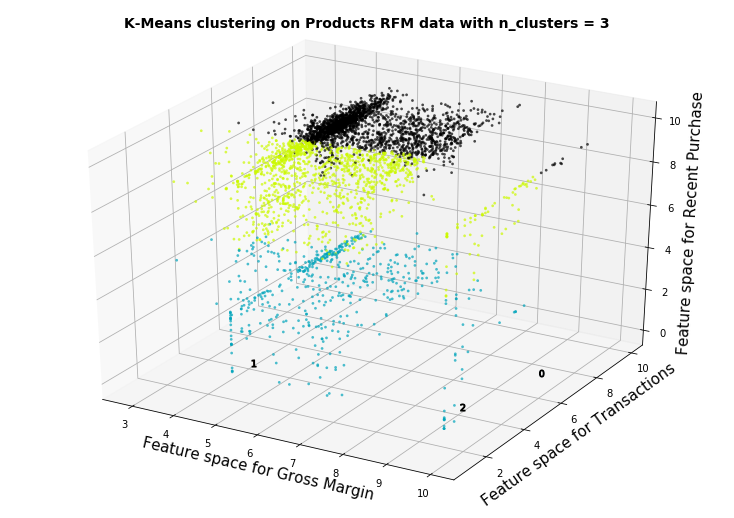

In [8]:
from mpl_toolkits.mplot3d import Axes3D

for n_clusters in range_n_clusters:
    fig,ax = plt.subplots(1,1)
    ax = Axes3D(fig)

    fig.set_size_inches(10,7)
    clusterer = KMeans(n_clusters=n_clusters,random_state=4292020)
    cluster_labels = clusterer.fit_predict(Y)
    silhouette_avg = silhouette_score(Y,cluster_labels)
    print("For n_clusters =",n_clusters,"The average silhouette_score is :",silhouette_avg)
    sample_silhouette_values = silhouette_samples(Y,cluster_labels)

    colors = cm.nipy_spectral(cluster_labels.astype(float)/n_clusters)
    ax.scatter(Y.iloc[:,-1],Y.iloc[:,-2],Y.iloc[:,-3],marker='.',s=30,lw=0,alpha=0.7,c=colors,edgecolor='k')
    centers = clusterer.cluster_centers_

    for i,c in enumerate(centers): ax.scatter(c[0],c[1],marker='$%d$' % i,alpha=1,s=50,edgecolor='k')
    ax.set_xlabel("Feature space for Gross Margin",size=15)
    ax.set_ylabel("Feature space for Transactions",size=15)
    ax.set_zlabel('Feature space for Recent Purchase',size=15)
    plt.suptitle(("K-Means clustering on Products RFM data with n_clusters = %d" % n_clusters),fontsize=14,fontweight='bold')
plt.show()

In [9]:
products_clusters = Y.copy()
products_clusters['Cluster'] = KMeans(n_clusters=3,random_state=4292020).fit_predict(Y)
products_final = products.iloc[:,:3].join(products_clusters)
products_final.sort_index(inplace=True)
products_final

,Recency,Frequency,Monetary,Recency_Scaled,Frequency_Scaled,Monetary_Scaled,Cluster
StockCode,,,,,,,
10002,497,85,-0.019906,9.838912,5.727976,4.975169,0
10080,631,20,-0.004559,7.468650,3.955771,5.082041,2
10120,507,18,-0.003336,9.641152,3.829962,5.090631,2
10123C,581,2,0.006359,8.288471,1.509686,5.158789,2
10124A,643,7,-0.010737,7.281554,2.742627,5.038827,2
10124G,769,4,0.005335,5.504109,2.151813,5.151610,1
10125,494,104,-0.018214,9.899014,5.978898,4.986876,0
10133,494,212,-0.010183,9.899014,6.868042,5.042688,0
10135,494,196,-0.051077,9.899014,6.769882,4.762967,0


In [10]:
products_final.to_csv('products_clusters.csv')